In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('../src/')

In [2]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

2.1.0


Complex Gaussian

In [3]:
from harmonic.functions import gaussian
real, imag = np.meshgrid(*(np.linspace(-1, 1, 1000) for _ in range(2)))
pdf = gaussian(real + imag * 1.j, 2)

[]

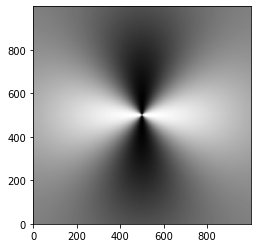

In [4]:
plt.imshow(pdf.real, cmap='gray', origin='lower')
plt.plot()

[]

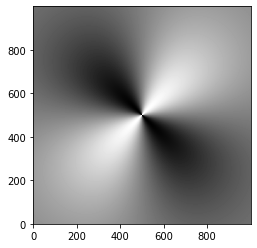

In [5]:
plt.imshow(pdf.imag, cmap='gray', origin='lower')
plt.plot()

Radial Profile

tf.Tensor(
[[19.24145746 19.21939445 19.19738837 ... 19.19738837 19.21939445
  19.24145746]
 [19.21939445 19.19734419 19.17535084 ... 19.17535084 19.19734419
  19.21939445]
 [19.19738837 19.17535084 19.1533702  ... 19.1533702  19.17535084
  19.19738837]
 ...
 [19.19738837 19.17535084 19.1533702  ... 19.1533702  19.17535084
  19.19738837]
 [19.21939445 19.19734419 19.17535084 ... 19.17535084 19.19734419
  19.21939445]
 [19.24145746 19.21939445 19.19738837 ... 19.19738837 19.21939445
  19.24145746]], shape=(1000, 1000), dtype=float64)
tf.Tensor(
[[[ 255940.2165574 ]]

 [[ 484668.90691219]]

 [[1000000.        ]]

 [[2237351.0701365 ]]], shape=(4, 1, 1), dtype=float64)


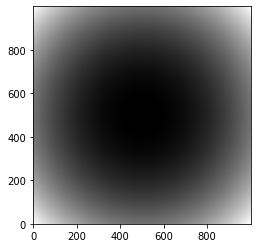

In [15]:
def fourier_ns(coeffs):
    start = -int(coeffs.shape[0] // 2)
    return tf.range(start, int(coeffs.shape[0]) + start, dtype='float64')

# Fourier coefficients for radial function
c_n = tf.Variable([1, 3, 2, 4], dtype='float64')[:, np.newaxis, np.newaxis]

with tf.GradientTape() as g:
    g.watch(c_n)

    ns = fourier_ns(c_n)[:, np.newaxis, np.newaxis]

    radii = tf.sqrt(real**2 + imag**2)[np.newaxis, ...]

    profile = tf.reduce_sum(c_n * tf.exp(ns * radii), axis=0)
    print(profile)

    print(g.gradient(profile, c_n))

plt.imshow(profile.numpy(), cmap='gray', origin='lower')